In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [52]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [53]:
df = pd.read_csv("data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 데이터 정보
- 'CLIENTNUM' : 고객 식별 번호
- 'Attrition_Flag' : 신용 카드 이탈 여부 
    - Existing Customer : 잔류
    - Attrited Customer : 탈퇴
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 고객 학력
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연소득 구간
- 'Card_Category' : 신용 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 월 수
- 'Contacts_Count_12_mon' : 연락 횟수
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- 'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'
- 'Total_Amt_Chng_Q4_Q1' : 결제 대금 기준 1분기 대비 4분기 (비율) 
- 'Total_Trans_Amt' : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- 'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [55]:
df.shape

(10127, 23)

In [56]:
# 나이브베이즈 컬럼 두개 삭제
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [57]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [58]:
# Customer_Age : 고객 나이
# Gender : 성별
# Dependent_count : 부양 가족 수

In [59]:
# 결측치 확인
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Text(0.5, 1.0, 'Customer_Age dist')

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Customer_Age dist'}, xlabel='Customer_Age', ylabel='Density'>

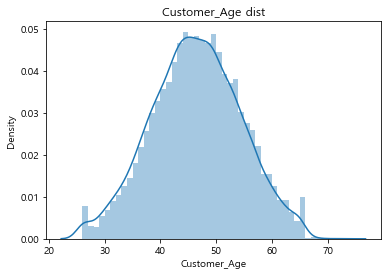

In [60]:
plt.title('Customer_Age dist')
sns.distplot(df["Customer_Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25fb56fe7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x25fb5704ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25fb5687d60>],
 'medians': [<matplotlib.lines.Line2D at 0x25fb5728d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25fb5752130>],
 'means': []}

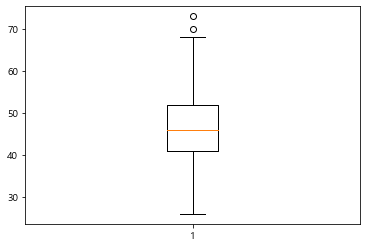

In [61]:
# 성별 상자그림
plt.boxplot(df["Customer_Age"])

## Gender preprocessing

<AxesSubplot:>

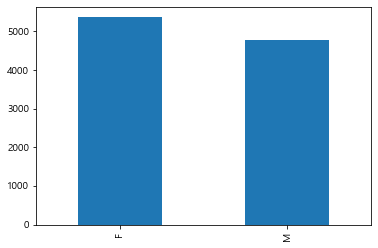

In [62]:
# 성별 bar chart
df['Gender'].value_counts().plot(kind = 'bar')

In [63]:
# 성별 이탈고객 수
gend_df = pd.DataFrame(df.loc[:,['Gender','Attrition_Flag']].value_counts())
gend_df

,,0
Gender,Attrition_Flag,
F,Existing Customer,4428
M,Existing Customer,4072
F,Attrited Customer,930
M,Attrited Customer,697


In [64]:
# 성별 평균 나이
df.groupby('Gender')['Customer_Age'].agg(**{'Customer_Age':'mean'}).reset_index()

,Gender,Customer_Age
0,F,46.456887
1,M,46.178863


In [65]:
# 성별 나이 분포
df[['Gender','Customer_Age']].value_counts()

Gender  Customer_Age
F       44              277
        45              272
        49              263
        47              258
        48              249
                       ... 
        66                2
M       67                2
        68                2
        70                1
        73                1
Length: 86, dtype: int64

In [66]:
# 성별 라벨링 F : 0, M : 1
df["Gender"].replace({"F":1, "M":0},inplace=True)

In [67]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,0,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [68]:
# # 라벨링은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (https://john-analyst.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%A0%88%EC%9D%B4%EB%B8%94-%EC%9D%B8%EC%BD%94%EB%94%A9%EA%B3%BC-%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9-f0220df21df1)
# # 그러므로 성별은 원핫 인코딩 진행
# Gender_ohe = pd.get_dummies(df['Gender'])
# Gender_ohe.head()

In [69]:
# # 데이터에 원핫 인코딩 컬럼 추가
# df_ohe = pd.concat([df, Gender_ohe], axis = 1)
# df_ohe.head()

## Dependent_count Preprocessing

In [70]:
# 부양 가족 수 값
df['Dependent_count'].value_counts().index

Int64Index([3, 2, 1, 4, 0, 5], dtype='int64')

Text(0.5, 1.0, 'Dependent_count')

C:\Users\ahj93\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='count'>

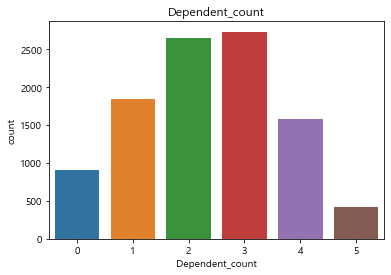

In [71]:
# 부양 가족 수 분포
plt.title('Dependent_count')
sns.countplot(df["Dependent_count"])

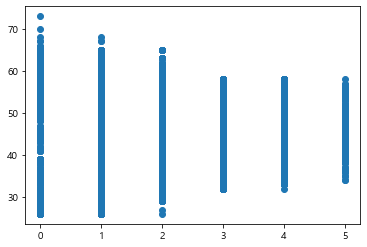

In [72]:
# 연령별 부양가족 수 (연령대로 범주 분할 후 재표현 필요)
plt.scatter(df["Dependent_count"], df["Customer_Age"])

In [73]:
bins = list(range(20,81,10))
bins

[20, 30, 40, 50, 60, 70, 80]

In [74]:
labels = [str(i) + '대' for i in bins]
labels

['20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [75]:
# 나이대 라벨 추가
df["age_bin"] = pd.cut(df["Customer_Age"], bins = bins, right = False, labels=labels[:-1])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_bin
0,768805383,Existing Customer,45,0,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,Existing Customer,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,Existing Customer,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대


In [76]:
# 연령대별 평균 부양가족 수
dependent = df.groupby('age_bin')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
dependent

,age_bin,dependent
0,20대,0.430769
1,30대,2.002173
2,40대,2.970401
3,50대,2.055037
4,60대,0.530189
5,70대,0.000000


<AxesSubplot:xlabel='age_bin', ylabel='dependent'>

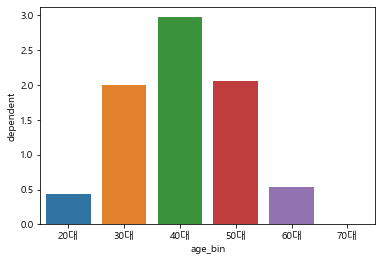

In [77]:
# 연령대별 평균 부양 가족 수
sns.barplot(x='age_bin',y='dependent',data=dependent)

In [78]:
# 성별 평균 부양가족 수
gender = df.groupby('Gender')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
gender

,Gender,dependent
0,0,2.352485
1,1,2.340612


In [79]:
# 연령대별 이탈고객
age_churn = pd.DataFrame(df.loc[:,['age_bin','Attrition_Flag']].value_counts().sort_index(ascending=True))
age_churn

0
age_bin Attrition_Flag         
20대     Attrited Customer    17
        Existing Customer   178
30대     Attrited Customer   261
        Existing Customer  1580
40대     Attrited Customer   772
        Existing Customer  3789
50대     Attrited Customer   506
        Existing Customer  2492
60대     Attrited Customer    71
        Existing Customer   459
70대     Existing Customer     2

## BrainStorming

In [80]:
df[["Income_Category","Education_Level"]]

,Income_Category,Education_Level
0,$60K - $80K,High School
1,Less than $40K,Graduate
2,$80K - $120K,Graduate
3,Less than $40K,High School
4,$60K - $80K,Uneducated
...,...,...
10122,$40K - $60K,Graduate
10123,$40K - $60K,Unknown
10124,Less than $40K,High School
10125,$40K - $60K,Graduate


In [81]:
y = [0,500,1000,1500,2000,2500,3000,3500,4000]
x1 = df[["Income_Category"]].value_counts()
x2 = df[["Education_Level"]].value_counts()
x2

Education_Level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64

Gender  Education_Level
0       College             481
        Doctorate           194
        Graduate           1458
        High School         985
        Post-Graduate       253
        Uneducated          691
        Unknown             707
1       College             532
        Doctorate           257
        Graduate           1670
        High School        1028
        Post-Graduate       263
        Uneducated          796
        Unknown             812
Name: CLIENTNUM, dtype: int64

<AxesSubplot:xlabel='Gender,Education_Level'>

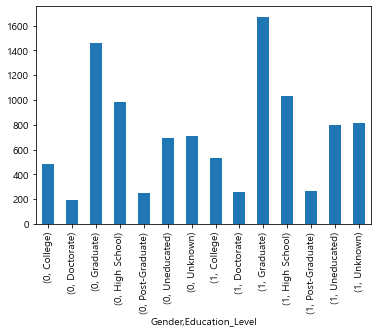

In [82]:
# 성별 교육수준
df_piv = df.groupby(['Gender','Education_Level']).count()["CLIENTNUM"]
df_piv

df_piv.plot(kind = 'bar')

Gender  Income_Category
0       $120K +             727
        $40K - $60K         776
        $60K - $80K        1402
        $80K - $120K       1535
        Less than $40K      277
        Unknown              52
1       $40K - $60K        1014
        Less than $40K     3284
        Unknown            1060
Name: CLIENTNUM, dtype: int64

<AxesSubplot:xlabel='Gender,Income_Category'>

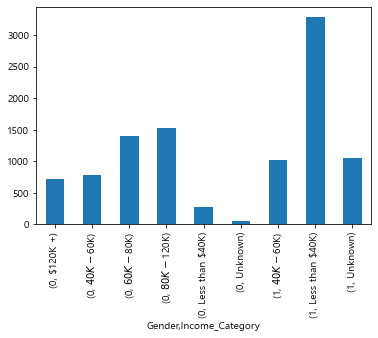

In [83]:
# 성별 수입
df_piv = df.groupby(['Gender','Income_Category']).count()["CLIENTNUM"]
df_piv

df_piv.plot(kind = 'bar')

Education_Level  Income_Category
College          $120K +              70
                 $40K - $60K         183
                 $60K - $80K         132
                 $80K - $120K        175
                 Less than $40K      345
                 Unknown             108
Doctorate        $120K +              37
                 $40K - $60K          70
                 $60K - $80K          59
                 $80K - $120K         57
                 Less than $40K      158
                 Unknown              70
Graduate         $120K +             204
                 $40K - $60K         553
                 $60K - $80K         422
                 $80K - $120K        478
                 Less than $40K     1139
                 Unknown             332
High School      $120K +             147
                 $40K - $60K         355
                 $60K - $80K         307
                 $80K - $120K        308
                 Less than $40K      671
                 Unknown

<AxesSubplot:xlabel='Education_Level,Income_Category'>

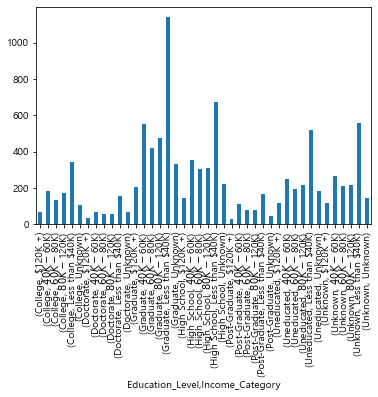

In [84]:
# 교육 수준별 수입
df_piv = df.groupby(['Education_Level','Income_Category']).count()["CLIENTNUM"]
df_piv

df_piv.plot(kind = 'bar')

In [85]:
x2 = df[["Education_Level"]].value_counts()
x2

Education_Level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64

<AxesSubplot:>

<AxesSubplot:xlabel='Income_Category'>

<AxesSubplot:>

<AxesSubplot:xlabel='Education_Level'>

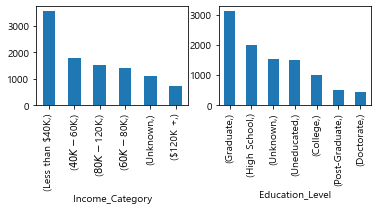

In [86]:

plt.subplot(221)
df[["Income_Category"]].value_counts().plot(kind = 'bar')

plt.subplot(222)
df[["Education_Level"]].value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='Income_Category'>

<AxesSubplot:xlabel='Education_Level'>

(0.0, 4000.0)

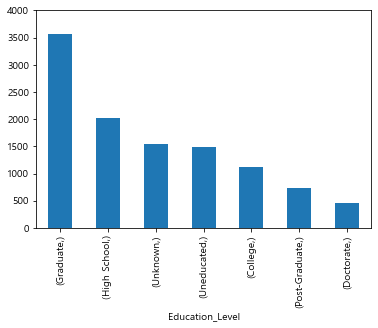

In [87]:
df[["Income_Category"]].value_counts().plot(kind = 'bar')
df[["Education_Level"]].value_counts().plot(kind = 'bar')
plt.ylim(0,4000)
plt.show()


In [88]:
df['Months_on_book']

0        39
1        44
2        36
3        34
4        21
         ..
10122    40
10123    25
10124    36
10125    36
10126    25
Name: Months_on_book, Length: 10127, dtype: int64

In [89]:
from scipy.stats import skew, kurtosis
skew(df['Months_on_book'])

-0.1065495749017217

{'whiskers': [<matplotlib.lines.Line2D at 0x25fb5abce80>,
 'caps': [<matplotlib.lines.Line2D at 0x25fb5abc2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25fb5a8c820>],
 'medians': [<matplotlib.lines.Line2D at 0x25fb59e6a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25fb5a4a7c0>],
 'means': []}

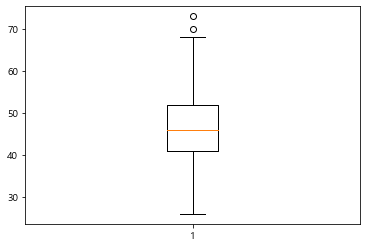

In [90]:

plt.boxplot(df["Customer_Age"])

In [ ]:
# 범주형 목록 : Education_Level, Marital_Status, Income_Category, Card_Category, age_bin

In [96]:
from scipy.stats import *
cross_t = pd.crosstab(df['Education_Level'],df['Income_Category'])
cross_t

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Education_Level,,,,,,
College,70,183,132,175,345,108
Doctorate,37,70,59,57,158,70
Graduate,204,553,422,478,1139,332
High School,147,355,307,308,671,225
Post-Graduate,30,111,77,81,170,47
Uneducated,119,249,195,217,522,185
Unknown,120,269,210,219,556,145


In [97]:
obs = cross_t.values
obs

array([[  70,  183,  132,  175,  345,  108],
       [  37,   70,   59,   57,  158,   70],
       [ 204,  553,  422,  478, 1139,  332],
       [ 147,  355,  307,  308,  671,  225],
       [  30,  111,   77,   81,  170,   47],
       [ 119,  249,  195,  217,  522,  185],
       [ 120,  269,  210,  219,  556,  145]], dtype=int64)

In [98]:
statistics, pvalue, dof, expected = chi2_contingency(obs, correction = False)

pvalue # 교육수준과 수입은 연관이 있음

0.03655347346001099

In [99]:
cross_t = pd.crosstab(df['Education_Level'],df['Marital_Status'])
cross_t

Marital_Status,Divorced,Married,Single,Unknown
Education_Level,,,,
College,86,467,386,74
Doctorate,36,205,182,28
Graduate,225,1479,1197,227
High School,128,949,782,154
Post-Graduate,41,243,189,43
Uneducated,136,656,586,109
Unknown,96,688,621,114


In [100]:
obs = cross_t.values
obs

array([[  86,  467,  386,   74],
       [  36,  205,  182,   28],
       [ 225, 1479, 1197,  227],
       [ 128,  949,  782,  154],
       [  41,  243,  189,   43],
       [ 136,  656,  586,  109],
       [  96,  688,  621,  114]], dtype=int64)

In [101]:
statistics, pvalue, dof, expected = chi2_contingency(obs, correction = False)

pvalue # 교육수준과 혼인여부는 연간이 없음

0.2545144493015186

In [102]:
cross_t = pd.crosstab(df['Income_Category'],df['Marital_Status'])
cross_t

Marital_Status,Divorced,Married,Single,Unknown
Income_Category,,,,
$120K +,52,354,274,47
$40K - $60K,138,816,704,132
$60K - $80K,108,661,531,102
$80K - $120K,103,735,561,136
Less than $40K,254,1628,1429,250
Unknown,93,493,444,82


In [103]:
obs = cross_t.values
obs

array([[  52,  354,  274,   47],
       [ 138,  816,  704,  132],
       [ 108,  661,  531,  102],
       [ 103,  735,  561,  136],
       [ 254, 1628, 1429,  250],
       [  93,  493,  444,   82]], dtype=int64)

In [104]:
statistics, pvalue, dof, expected = chi2_contingency(obs, correction = False)

pvalue # 수입과 혼인여부는 연간이 없음

0.31078477876703936